In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.4.1


In [2]:
# Colab의 /content/gdrive 에 Google Drive 마운트 시킴

from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
# Colab와 Google Drive Mount
import os

working_dir = 'dataset'

# Google Drive에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'    # 앞쪽은 마운트 시킬 / 뒤쪽은 파일저장된 (My_Drive)

original_dir = os.getcwd()     # 현재 dir저장

try :

  os.chdir(colab_default_dir)     # GoogleDrive의 Colab 기본 디렉토리로 이동

  if not os.path.exists(working_dir):     # working 디렉토리 없으면 생성
    os.mkdir(working_dir)

  os.chdir(working_dir)     # working 디렉토리 이동
  print('current dir =', os.getcwd())

except Exception as err:

  os.chdir(original_dir)
  print(str(err))

current dir = /content/gdrive/My Drive/Colab Notebooks/dataset


In [4]:
import numpy as np

try :

  loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

  x_data = loaded_data[:, 0:-1]
  t_data = loaded_data[:, [-1]]

  print(x_data.shape, t_data.shape)
  
except Exception as err:

  print(str(err))




(759, 8) (759, 1)


In [5]:
model = Sequential()

model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1],),activation='sigmoid'))

In [9]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)   
# validation_split = 0.2  => train_data로부터 20% 비율로 validation data 생성 후 overfitting 확인

Epoch 1/500
19/19 - 1s - loss: 0.7504 - accuracy: 0.3839 - val_loss: 0.7362 - val_accuracy: 0.4211
Epoch 2/500
19/19 - 0s - loss: 0.7308 - accuracy: 0.4267 - val_loss: 0.7193 - val_accuracy: 0.4671
Epoch 3/500
19/19 - 0s - loss: 0.7146 - accuracy: 0.4580 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 4/500
19/19 - 0s - loss: 0.7012 - accuracy: 0.5206 - val_loss: 0.6938 - val_accuracy: 0.5395
Epoch 5/500
19/19 - 0s - loss: 0.6899 - accuracy: 0.5453 - val_loss: 0.6841 - val_accuracy: 0.5724
Epoch 6/500
19/19 - 0s - loss: 0.6805 - accuracy: 0.5766 - val_loss: 0.6762 - val_accuracy: 0.5987
Epoch 7/500
19/19 - 0s - loss: 0.6726 - accuracy: 0.6013 - val_loss: 0.6694 - val_accuracy: 0.6118
Epoch 8/500
19/19 - 0s - loss: 0.6659 - accuracy: 0.6145 - val_loss: 0.6638 - val_accuracy: 0.6316
Epoch 9/500
19/19 - 0s - loss: 0.6601 - accuracy: 0.6096 - val_loss: 0.6589 - val_accuracy: 0.6382
Epoch 10/500
19/19 - 0s - loss: 0.6552 - accuracy: 0.6178 - val_loss: 0.6547 - val_accuracy: 0.6250
Epoch 11/

In [11]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7642


[0.4847959876060486, 0.7641633749008179]

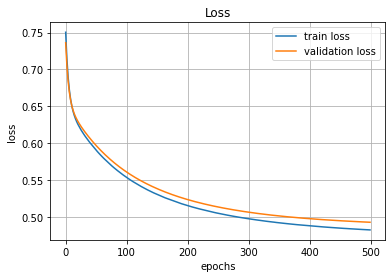

In [15]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

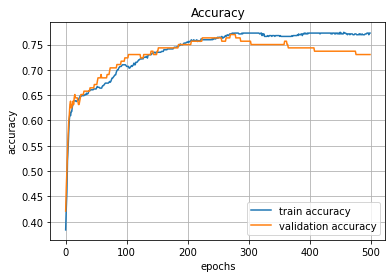

In [16]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

200번 이상부터 overfitting 확인 가능